# Can we predict cryptocurrency market value?

### Setup
Let's begin by reading in some data from [this Kaggle page](https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory/home), named `bitcoin_dataset.csv`

**BTC** is an abbrevation for "Bitcoin".

Here are some of the features included in the dataset: 

- **btc_market_price** : Average USD market price across major bitcoin exchanges.
- **btc_total_bitcoins** : The total number of bitcoins that have already been mined.
- **btc_difficulty** : A relative measure of how difficult it is to find a new block.
- **btc_miners_revenue** : Total value of coinbase block rewards and transaction fees paid to miners.
- **btc_n_transactions** : The number of daily confirmed Bitcoin transactions.
- **btc_n_transactions_excluding_popular** : The total number of Bitcoin transactions, excluding the 100 most popular addresses.
- **btc_estimated_transaction_volume_usd** : The estimated transaction value in USD value.


Bitcoin transactions occur when someone buys or transfers bitcoin to another person's bitcoin wallet. The person doing the transfer has to pay a transaction fee. Many factors affect these fees.


In [20]:
# Import packages
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf # linear modeling
import matplotlib.pyplot as plt # plotting
from sklearn import linear_model

Read in the data, and create a new dataframe with __only__ the columns mentioned above.

Use dataframe.head() to view the first few rows.

In [2]:
# Load data, select only columns of interest mentioned above
df = pd.read_csv('./data/bitcoin_dataset.csv')

What are the data types in the columns?

In [13]:
# Determine data types (something that can determine the types of analysis possible)
print(df.dtypes)

Date                                                    object
btc_market_price                                       float64
btc_total_bitcoins                                     float64
btc_market_cap                                         float64
btc_trade_volume                                       float64
btc_blocks_size                                        float64
btc_avg_block_size                                     float64
btc_n_orphaned_blocks                                  float64
btc_n_transactions_per_block                           float64
btc_median_confirmation_time                           float64
btc_hash_rate                                          float64
btc_difficulty                                         float64
btc_miners_revenue                                     float64
btc_transaction_fees                                   float64
btc_cost_per_transaction_percent                       float64
btc_cost_per_transaction                               

## Exploratory data analysis
Create at least two visualizations of the dataset to explore:
- The distribution of your outcome variable
- The relationship(s) between your outcome of interest and any other feature(s)

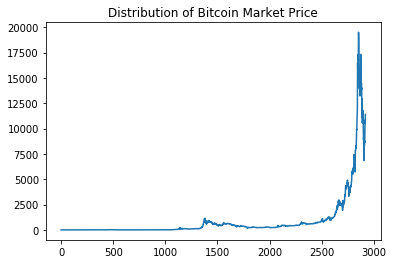

In [15]:
# Chart showing distribution of outcome variable 
plt.plot(df.btc_market_price)
plt.title("Distribution of Bitcoin Market Price")
plt.show()

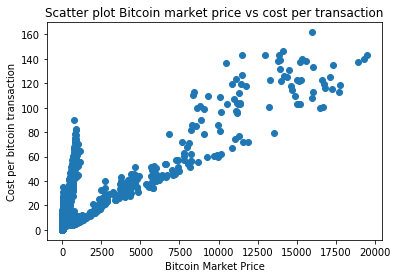

In [18]:
# Comparison of outcome to the variable(s) of your choice
# This should be based on a question you want to answer 
# (e.g., is bitcoin price related to XX)
plt.scatter(df.btc_market_price, df.btc_cost_per_transaction)
plt.title("Scatter plot Bitcoin market price vs cost per transaction")
plt.xlabel("Bitcoin Market Price")
plt.ylabel("Cost per bitcoin transaction")
plt.show()

## Univariate linear regression
Propose a null and alternative hypothesis regarding the relationship betwen your outcome of interest and a single feature of your choice.

> **Answer**:
>> Null Hypothesis: There is a linear relationship between bitcoin market price and cost per bitcoin transaction.

>>Alternative Hypothesis: There is a no linear relationship between bitcoin market price and cost per bitcoin transaction.

In [56]:
# Use a linear regression to assess your null hypothesis


#import matplotlib.pyplot as plt 
#import numpy as np 
#from sklearn import datasets, linear_model, metrics 
  
# load the boston dataset 
#boston = datasets.load_boston(return_X_y=False) 
  
# defining feature matrix(X) and response vector(y) 
#X = boston.data 
#y = boston.target 
  
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, 
                                                    random_state=1) 
  
# create linear regression object 
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(X_train, y_train)
#reg.coef_

array([-8.80740828e-02,  6.72507352e-02,  5.10280463e-02,  2.18879172e+00,
       -1.72283734e+01,  3.62985243e+00,  2.13933641e-03, -1.36531300e+00,
        2.88788067e-01, -1.22618657e-02, -8.36014969e-01,  9.53058061e-03,
       -5.05036163e-01])

#### An aside: Scientific notation refresher

2.42e-06 is the same as 2.42 * 10^(-6) = 0.00000242

2.42e+06 is the same as 2.42 * 10^(6) = 2420000

(These are example values, not the ones you should see in the regression you just did.)


### Interpret the results. 
Write out the formula for the linear regression, using the values within y = mx + b slope-intercept formula, where y is your outcome of interest, and `x` is the feature you are investigating.

> **Answer**: Market Price = (beta_1) * Transaction Cost + (beta_0)

What is the beta value (coefficient) for you independent variable? What does it indicate to you?

> **Answer:** Regression coefficient is 6.72507352e-02 which means for every unit increase in transaction cost, the market price of bitcoin increased by 6.72507352e-02 units.

What is the model's intercept value? What does it indicate to you?

> **Answer:** The model has an intercept value -8.80740828e-02 which means that when there is zero cost of transaction then the value of bitcoin would have been decreased from 0 by 8.80740828e-02.

Based on your model, can you reject your null hypothesis? If so, what do you believe the relationship to be between your independent and dependent variables? Make sure to include specific values in your response.

> **Answer:** 

Based on the model we can reject the null hypothesis because the p-value is not significantly high.

### Visualization
Draw a scatterplot comparing your outcome of interest to your predictions. For comparison, draw a 45 degree line (i.e., x = y line) to show how well the model fits the data.

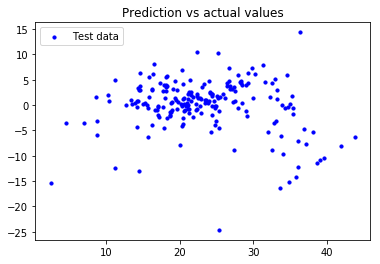

In [59]:
# Draw your graph here
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data')
plt.title("Prediction vs actual values")
plt.legend()
plt.show()

### Multiple Linear Regression

Create a mulitple linear regression model to predict `btc_market_price` based on all the features listed in your dataframe. Show the summary statistics from the model.

In [73]:
# Create your linaer model here and print the summary of the model
model = smf.glm(formula='btc_market_price ~ btc_n_transactions_per_block + btc_n_transactions_total + btc_difficulty ',
                        data=df).fit()


#model.summary()




How much variation in the outcome can you predict using all of the variables in the dataset?

> **Answer:**  0.703 or 70.3% of the variation can be accomodated with this linear model.

Does this mean it's easy to predict bitcoin price (and you should therefore start investing in it)?

> **Answer:** This does not mean its easy to predict bitcoin, if it were true, everyone would be rich with plenty asset, there are more things dynamically influecing the fluctuation in bitcoins and we need to include the other bitcoins and the role they play as well. This is a complex web of databases neeeded to be involved.